# Produce expectation at different points

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd
import pickle
import gc

from exp_analysis_class import full_likelihood, compute_likelihood_from_retrieved
from dark_nus_utils import load_datasets
from const import alphaQED
from analyses_dict import analyses
from parameters_dict import *
from dark_nus_utils import retrieve_full_analysis

from likelihood_contours_plot import *

In [45]:
hierarchy = 'heavy'
D_or_M = 'majorana'

save_folder = f'../fig/4_checks_at_different_points/{hierarchy}_{D_or_M}/'
!mkdir -p $save_folder

set_plot_style()

In [6]:
# my_exp_analyses = load_datasets(hierarchies=['heavy', 'light'],
#                                   D_or_Ms=D_or_M,
#                                   fluxes=['FHC', 'RHC'],
#                                 timeit=True, 
#                                 direct_load_objects=False,
#                                 load_grid=False,
#                                 dump=True,
#                                 nentries=1000000)

In [5]:
my_exp_analyses = load_datasets(
                                hierarchies=hierarchy, 
                                D_or_Ms=D_or_M, 
                                fluxes=['FHC', 'RHC'],
                                timeit=True, 
                                direct_load_objects=True,
                                load_grid=False,
                                dump=False,
                                nentries=1000000)

heavy majorana FHC
Wall time: 11.194324016571045 s, CPU time: 1.1193290230000001
heavy majorana RHC
Wall time: 11.212814569473267 s, CPU time: 1.1021577060000007


In [9]:
this_analysis = my_exp_analyses['heavy_majorana_FHC']

In [21]:
m4_s = np.linspace(0.05, 0.15, 15)
out = this_analysis.compute_expectation(this_analysis.df_base, 
                                  m4=m4_s, 
                                  mz=physics_parameters[hierarchy]['bp']['mz'], 
                                  alpha_dark=physics_parameters[hierarchy]['bp']['alpha_dark'], 
                                  epsilon=physics_parameters[hierarchy]['bp']['epsilon'], 
                                  Umu4_2=physics_parameters[hierarchy]['bp']['Umu4_2'], 
                                  Ud4_2=physics_parameters[hierarchy]['bp']['Ud4_2'],
                                  ntarget_per_material=analyses['tpc']['FHC']['n_target'], 
                                  pot=1,
                                  selection_query='carbon',
                                  efficiency_factor=1,
                                  out_different_weights=True,
                                  no_pot_efficiency=False)

In [43]:
ctau_expectation = out[1][2].squeeze().sum(axis=0)
kde_expectation = (out[1][0]*out[1][1]*out[1][3]).squeeze().sum(axis=0)
kde_error = np.sqrt(((out[1][0]*out[1][1]*out[1][3])**2).squeeze().sum(axis=0))
total_expectation = (out[1][0]*out[1][1]*out[1][2]*out[1][3]).squeeze().sum(axis=0)

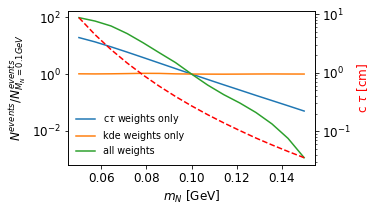

In [50]:
plt.plot(m4_s, ctau_expectation/ctau_expectation[7], label=r'c$\tau$ weights only')
plt.plot(m4_s, kde_expectation/kde_expectation[7], label='kde weights only')
plt.plot(m4_s, total_expectation/total_expectation[7], label='all weights')
plt.legend(frameon=False, loc='lower left')
plt.yscale('log')
plt.xlabel(r'$m_N$ [GeV]')
plt.ylabel(f'$N^{{events}} / N^{{events}}_{{M_N = {m4_s[7]} GeV}}$')

ax2 = plt.gca().twinx()
ax2.plot(m4_s, np.squeeze(out[3]), 'r--')
ax2.set_ylabel(r'c $\tau$ [cm]', color='r')
ax2.set_yscale('log')

plt.savefig(save_folder + 'weights_sum_vs_m_n.pdf', bbox_inches='tight')

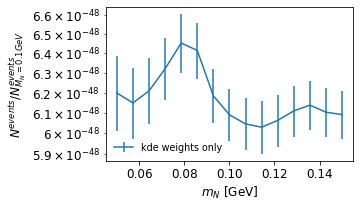

In [47]:
plt.errorbar(m4_s, kde_expectation, yerr=kde_error, label='kde weights only')
plt.legend(frameon=False, loc='lower left')
plt.yscale('log')
plt.xlabel(r'$m_N$ [GeV]')
plt.ylabel(f'$N^{{events}} / N^{{events}}_{{M_N = {m4_s[7]} GeV}}$')
plt.savefig(save_folder + 'kde_weights_sum_vs_m_n.pdf', bbox_inches='tight')